Daily Challenge: Interactive Data Visualization with Matplotlib and Seaborn

== 1. Data Ingestion and Initial Assessment == 

In [3]:
pip install pandas

  Using cached pandas-2.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached numpy-2.3.0-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.0-cp313-cp313-macosx_11_0_arm64.whl (10.7 MB)
Using cached numpy-2.3.0-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]2m3/4 [pandas]
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_excel("US Superstore data.xls")

# Display the first few rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Overview of dataset structure

print("\nℹDataset information:")
print(df.info())

print("\n📈 Statistical Summary:")
print(df.describe(include='all'))

print("\nAvailable columns list:")
print(df.columns)

print("\n🔍 Missing Values Per Column:")
print(df.isnull().sum())


ℹDataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15

In [6]:
# 1. What is the data type of the date columns?

print("Order Date type:", df['Order Date'].dtype)
print("Ship Date type:", df['Ship Date'].dtype)

Order Date type: datetime64[ns]
Ship Date type: datetime64[ns]


In [7]:
# 2. What is the time frame of the dataset?

print("Date Range:")
print("Order Date:", df['Order Date'].min(), "to", df['Order Date'].max())

Date Range:
Order Date: 2014-01-03 00:00:00 to 2017-12-30 00:00:00


In [ ]:
# 3. Any significant data gaps?

# We inspect missing values with isnull().sum() above.

df.isnull().mean().sort_values(ascending=False) # Visual exploration

Row ID           0.0
Postal Code      0.0
Discount         0.0
Quantity         0.0
Sales            0.0
Product Name     0.0
Sub-Category     0.0
Category         0.0
Product ID       0.0
Region           0.0
State            0.0
Order ID         0.0
City             0.0
Country          0.0
Segment          0.0
Customer Name    0.0
Customer ID      0.0
Ship Mode        0.0
Ship Date        0.0
Order Date       0.0
Profit           0.0
dtype: float64

Eventuelles conclusions ?

In [8]:
# 2. Data Cleaning and Preprocessing

# Handling Missing Values

# Check columns with missing data again
missing = df.isnull().sum()
print(missing[missing > 0])

Series([], dtype: int64)


In [9]:
# Removing Duplicates

duplicates = df.duplicated().sum()
print("🔁 Duplicate rows:", duplicates)

# Remove duplicates
df.drop_duplicates(inplace=True)

🔁 Duplicate rows: 0


In [10]:
# Date Conversion

# Convert dates to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [11]:
# 3. Feature Engineering

# Avoid division by zero
df['Profit Margin (%)'] = df.apply(lambda row: (row['Profit'] / row['Sales'] * 100) if row['Sales'] != 0 else 0, axis=1)

In [12]:
# Order Year and Month

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month_name()

# PHASE 2: EXPLORATORY ANALYSIS WITH MATPLOTLIB

In [5]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 216 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 3.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 14.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 14.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [16]:
 pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact, widgets

df = pd.read_excel("US Superstore data.xls")

In [22]:
# Nettoyage si besoin

df.drop_duplicates(inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.to_period('M').astype(str)
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

A FAIRE !!!

✅ Phase 1 Summary
✅ Dataset loaded and assessed

✅ Missing values handled with justification

✅ Duplicates removed

✅ Date columns converted for time-series analysis

✅ New features added for business-relevant analysis (Profit Margin, Year, Month)

In [25]:
# PHASE 2.1: Time-Series Sales Trend
sales_by_month = df.groupby(['Order Date', 'Category'])['Sales'].sum().reset_index()

@interact(category=widgets.Dropdown(options=df['Category'].unique(), description="Category:"))
def plot_sales_trend(category):
    data = sales_by_month[sales_by_month['Category'] == category]
    plt.figure(figsize=(14, 5))
    plt.plot(data['Order Date'], data['Sales'], marker='o')
    plt.title(f"Monthly Sales Trend for {category}")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



interactive(children=(Dropdown(description='Category:', options=('Furniture', 'Office Supplies', 'Technology')…

CCL : 2.1 A FAIRE !!!!

Un graphique interactif avec ipywidgets permet de filtrer les ventes par catégorie de produit.

On observe les variations mensuelles pour détecter des tendances, des pics saisonniers, ou des baisses.

In [ ]:
# PHASE 2.2: Geographic Sales Performance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Agréger les ventes par État
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()

# Fonction d'affichage du graphique avec un Top N dynamique
def plot_top_states(n):
    top_states = sales_by_state.head(n)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_states, x='Sales', y='State', hue='State', palette='viridis', legend=False)
    plt.title(f'Top {n} States by Total Sales')
    plt.xlabel('Total Sales ($)')
    plt.ylabel('State')
    plt.tight_layout()
    plt.show()

# Slider interactif pour le top N
slider = widgets.IntSlider(value=10, min=3, max=20, step=1, description='Top N States:')
widgets.interact(plot_top_states, n=slider)


interactive(children=(IntSlider(value=10, description='Top N States:', max=20, min=3), Output()), _dom_classes…

<function __main__.plot_top_states(n)>

CCL : 2.2 A FAIRE !!!!

Bar chart interactif : affiche les Top N états en termes de chiffre d'affaires avec un slider.

Cela aide à identifier les zones à fort potentiel ou sous-performantes.

Phase 3 : Communicating Findings with Seaborn


In [29]:
#### 1. **Basic Plotting in Python** (using matplotlib):


/var/folders/r6/h24sb_sj1c579ck062z_39dm0000gn/T/ipykernel_23825/2056801166.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
/var/folders/r6/h24sb_sj1c579ck062z_39dm0000gn/T/ipykernel_23825/2056801166.py:15: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/teddan/Desktop/GenAI/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


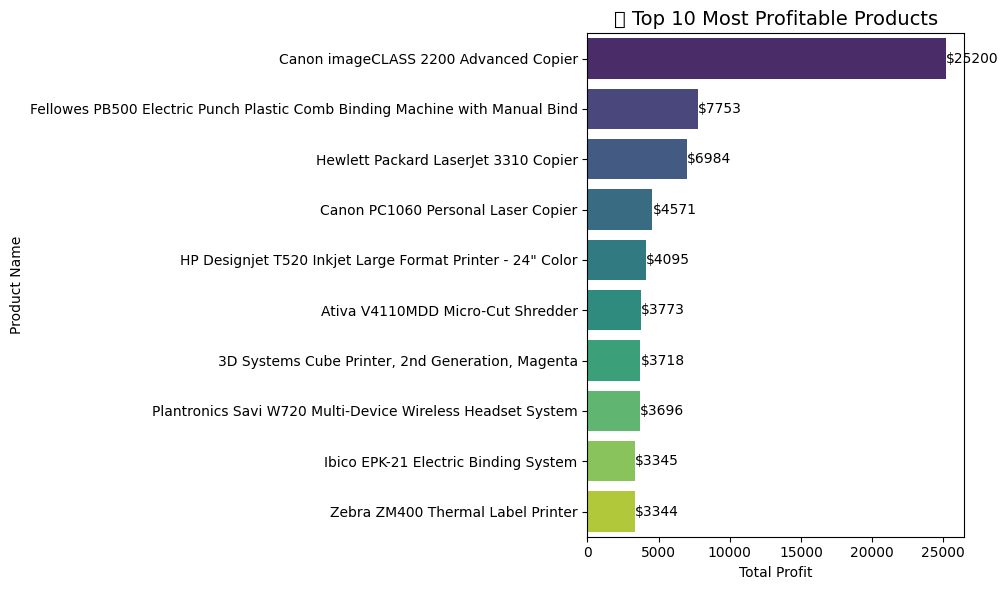

In [30]:
# Regrouper par nom de produit et totaliser le profit
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

# Tracer un barplot horizontal
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")

# Ajouter les annotations sur les barres
for i, value in enumerate(top_products.values):
    ax.text(value + 10, i, f"${value:.0f}", va='center')

plt.title("🔝 Top 10 Most Profitable Products", fontsize=14)
plt.xlabel("Total Profit")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

In [32]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


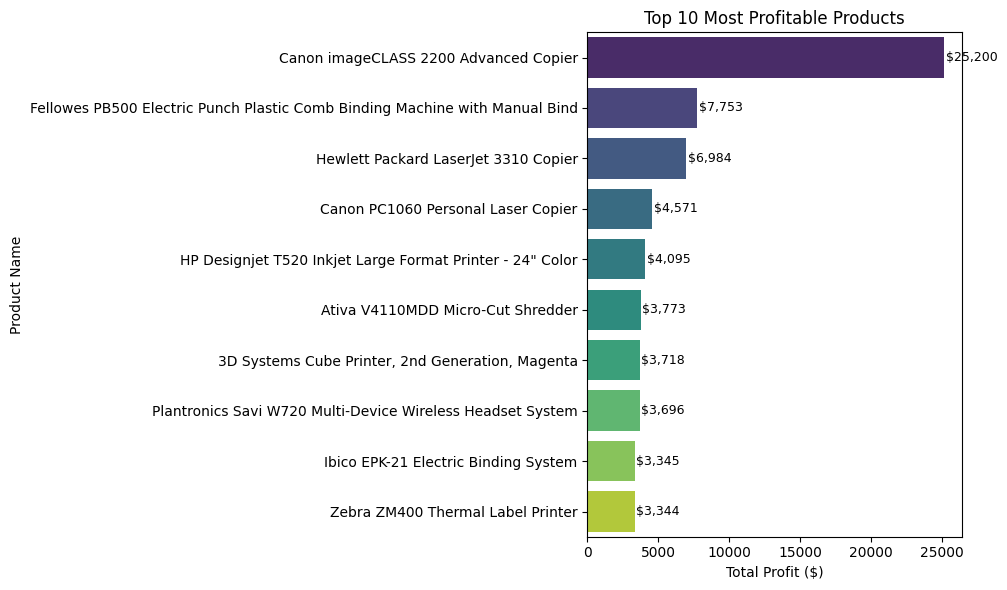

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agréger les profits par produit
product_profit = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False)

# Sélection des 10 produits les plus rentables
top_products = product_profit.head(10).reset_index()
top_products.columns = ["Product Name", "Total Profit"]

# Création du graphique avec palette et hue
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_products,
    x="Total Profit",
    y="Product Name",
    hue="Product Name",  # Trick pour autoriser palette sans warning
    palette=sns.color_palette("viridis", n_colors=len(top_products)),
    dodge=False,         # Important : empêche la décalage horizontal
    legend=False         # On ne veut pas une légende redondante
)

# Ajout des annotations
for i, v in enumerate(top_products["Total Profit"]):
    ax.text(v + 100, i, f"${v:,.0f}", va="center", fontsize=9)

# Titre et labels
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Total Profit ($)")
plt.ylabel("Product Name")

plt.tight_layout()
plt.show()

CCL